<a href="https://colab.research.google.com/github/Epsita-R/Computer-Vision/blob/main/2348517_CV_Lab05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Necessary Libraries**

---



In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**Importing the Image**

---



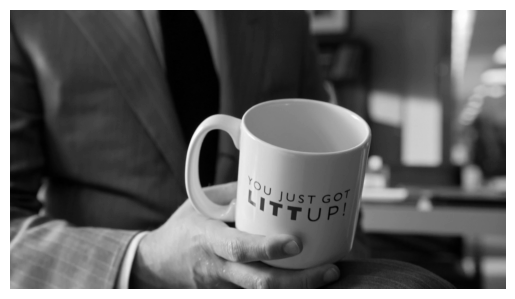

In [2]:
# original image
f = cv2.imread("/content/Litt_Up_Mug_(4x06).png",0)

plt.imshow(f, cmap="gray")
plt.axis("off")
plt.show()

**Convert the image to the frequency domain using the Discrete Fourier Transform (DFT).**

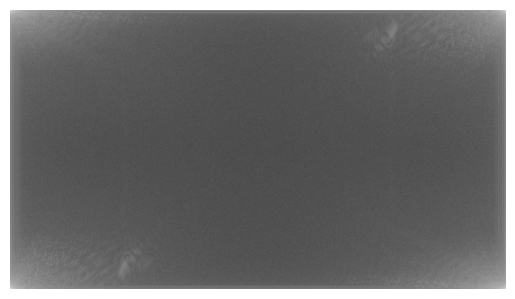

In [3]:
# image in frequency domain
F = np.fft.fft2(f)
plt.imshow(np.log1p(np.abs(F)),cmap="gray")
plt.axis("off")
plt.show()

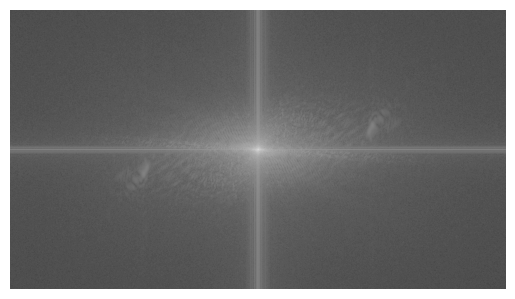

In [4]:
# Shifiting low frequency component to center of the image
Fshift = np.fft.fftshift(F)
#calculate the magnitude of the Fourier Transform used to visualize the frequency content of an image
plt.imshow(np.log1p(np.abs(Fshift)),cmap="gray")
plt.axis("off")
plt.show()

**Ideal Low Pass Filter**

---

- ILPF attenuates high-frequency components of the image while preserving low-frequency components.
- The filter allows frequencies below a certain cutoff frequency to pass unchanged and attenuates frequencies above the cutoff frequency.
- In the frequency domain, ILPF is represented by a circular mask centered at the zero-frequency component (DC component) with a radius corresponding to the cutoff frequency.
- ILPF is effective for blurring and smoothing images, removing high-frequency noise, and reducing sharp transitions or edges.

**Create the filter mask for ILPF**

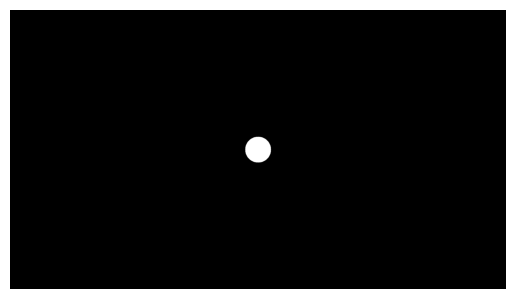

In [5]:
# Filter: Low pass filter
M,N = f.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 50

for u in range(M):
  for v in range(N):
    D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
    if D <= D0:
      H[u,v] = 1
    else:
      H[u,v] = 0

plt.imshow(H, cmap="gray")
plt.axis("off")
plt.show()

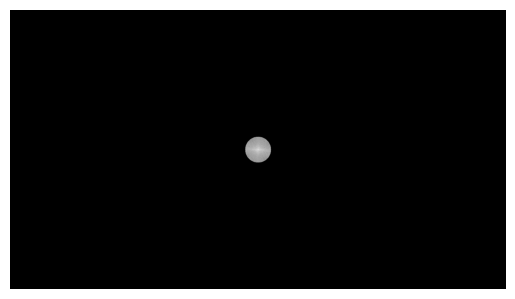

In [6]:
# Ideal Low Pass Filtering
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)),cmap="gray")
plt.axis("off")
plt.show()

**Apply the filter mask to the frequency domain representation of the image.**

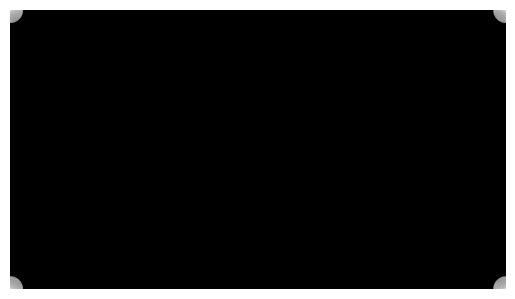

In [7]:
# Inverse the shifted Fourier Transform
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)),cmap="gray")
plt.axis("off")
plt.show()

**Convert the filtered image back to the spatial domain using the Inverse Discrete Fourier Transform (IDFT).**

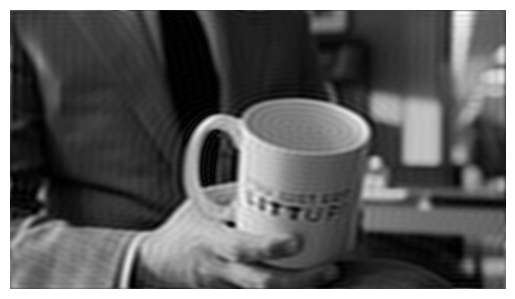

In [8]:
#Inverse the fourier transformation
g = np.abs(np.fft.ifft2(G))
plt.imshow(g, cmap="gray")
plt.axis("off")
plt.show()

**Ideal High Pass Filter**

---

- IHPF attenuates low-frequency components of the image while preserving high-frequency components.
- The filter allows frequencies above a certain cutoff frequency to pass unchanged and attenuates frequencies below the cutoff frequency.
- In the frequency domain, IHPF is represented by a circular mask with a hole (annulus) centered at the zero-frequency component, where the inner radius corresponds to the cutoff frequency.
- IHPF is effective for sharpening images, enhancing edges, and emphasizing fine details or textures.

**Create the filter mask for IHPF**

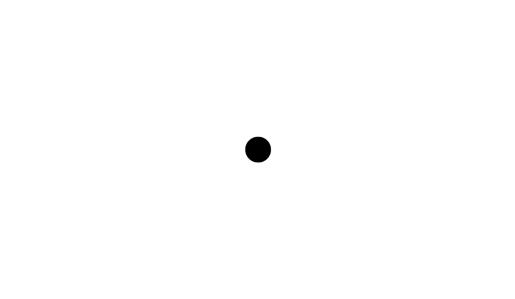

In [9]:
# Filter: High pass filter
H = 1 - H

plt.imshow(H, cmap="gray")
plt.axis("off")
plt.show()

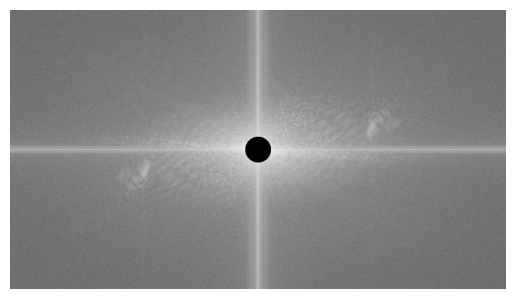

In [10]:
# Ideal High Pass Filtering
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)),cmap="gray")
plt.axis("off")
plt.show()


**Apply the filter mask to the frequency domain representation of the image.**

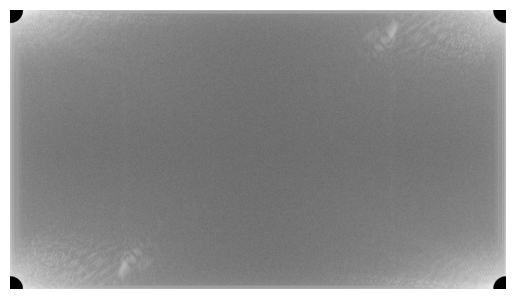

In [11]:
# Inverse Fourier Transform
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)),cmap="gray")
plt.axis("off")
plt.show()

**Convert the filtered image back to the spatial domain using the Inverse Discrete Fourier Transform (IDFT).**

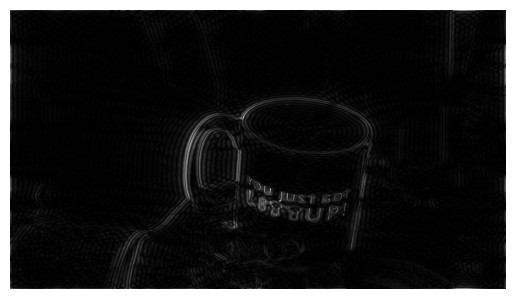

In [12]:
g = np.abs(np.fft.ifft2(G))
plt.imshow(g, cmap="gray")
plt.axis("off")
plt.show()

**Limitations and Considerations:**

---



- Ideal filters have sharp transitions in the frequency domain, which can cause ringing artifacts or aliasing effects in the spatial domain.
- Practical implementations often use approximations or modifications of ideal filters, such as Gaussian filters or Butterworth filters, to mitigate these issues.
- The choice of cutoff frequency plays a crucial role in the filtering process, and it should be selected based on the characteristics of the image and the desired filtering effect.